In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r



GPU acceleration is NOT available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2016,1,22)
test_end = dt.datetime(2023,3,14)


In [3]:
#buy and hold
import time
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
start_time = time.time()
bah.run_strategy(ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))
bah.trades

--- 0.0016214847564697266 seconds ---


,Signal
Date,
2015-04-01,1
2023-03-14,-1


In [4]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.3962082862854004 seconds ---



<Ab.StockData object at 0x7fab28767c40>:
cumulative return      : 439.97%
compound anual return  : 23.4657%
max_drawdown           : -81.11%
sharp_ratio            : 4.15%
average of daily return: 0.1767%
std of daily return    : 4.2618%
number of trades       : 2,
trading days           : 2904,
batting Average        : 100.00%
Gain Average           : 439.97%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


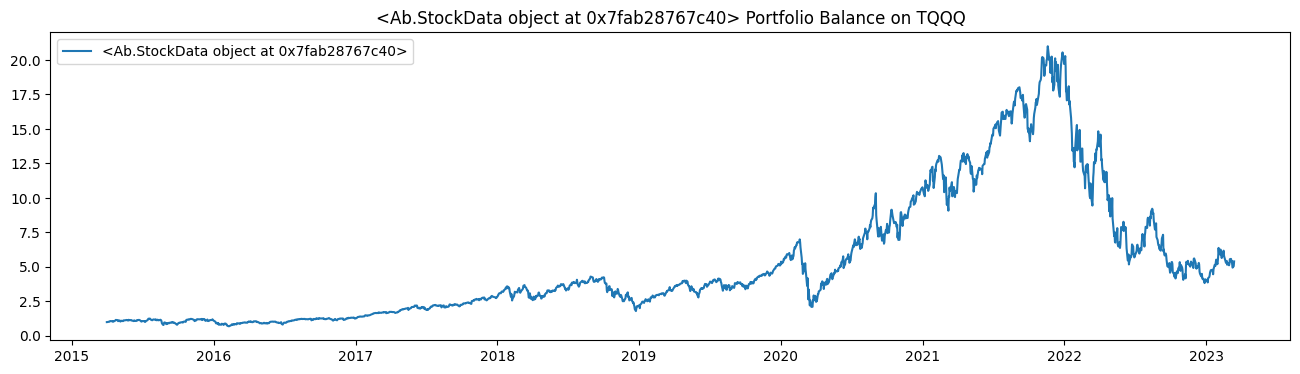

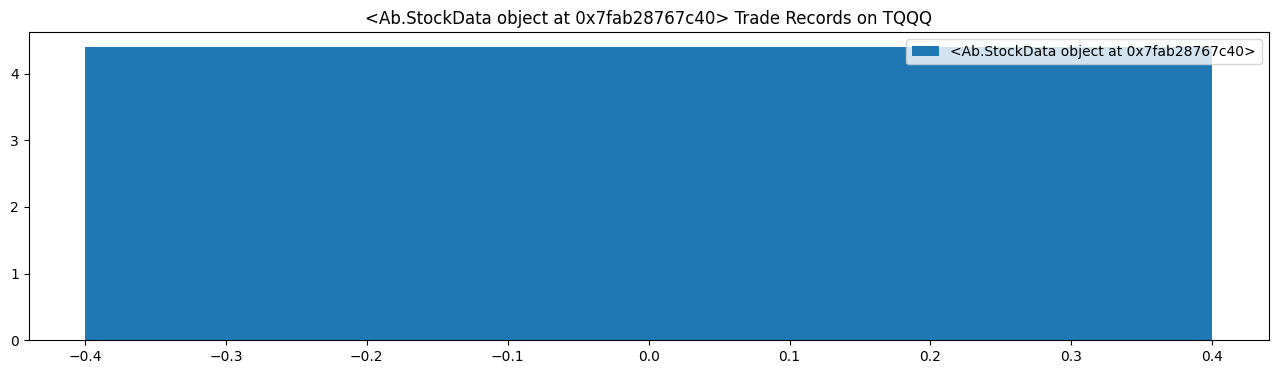

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [6]:
bah_bt.trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %,HoldingDays,LongTermProfit,ShortTermProfit,TaxCollectYear,TaxCollected
0,2015-04-01,2023-03-14 00:00:00,TQQQ,0.237037,4.21875,22.780001,4.399704,4.399704,2904.0,4.399704,0.0,2024.0,0.0


In [7]:
stg = ab.Threshold('NAA200R')
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)


In [8]:
stg.trades.loc[stg.trades['Signal'] !=0]

,Signal
Date,
2015-04-13,1.0
2015-04-14,1.0
2015-04-15,1.0
2015-04-16,1.0
2015-04-20,1.0
...,...
2023-02-14,1.0
2023-02-15,1.0
2023-02-16,1.0


In [9]:
naa200r_bt_weekly = ab.BackTest()
naa200r_bt_weekly.run_backtest(stg, ticker,test_start,test_end, True,True)



NAA200R 15/30 MA 20:
cumulative return      : 1269.52%
compound anual return  : 38.6983%
max_drawdown           : -59.61%
sharp_ratio            : 5.60%
average of daily return: 0.1877%
std of daily return    : 3.3507%
number of trades       : 21,
trading days           : 2904,
batting Average        : 40.00%
Gain Average           : 111.41%
Loss Average           : -11.62%
Risk Reward Ratio      : 9.59
Gain STD               : 180.71%
Loss STD               : 6.78%
        


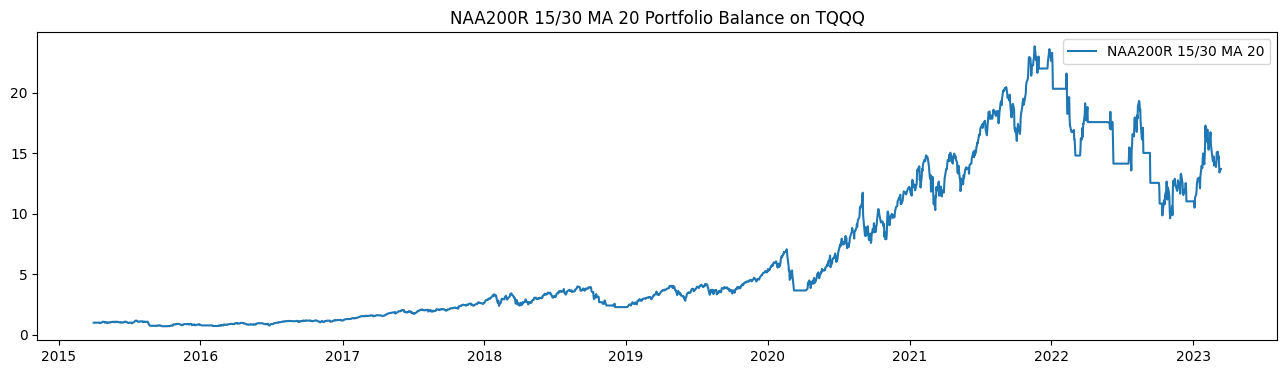

In [10]:
import matplotlib.pyplot as plt
naa200r_bt_weekly.plot_balance()
naa200r_bt_weekly.performance_summary()

plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))




,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %,HoldingDays,LongTermProfit,ShortTermProfit,TaxCollectYear,TaxCollected
0,2015-04-13,2015-08-24 00:00:00,TQQQ,0.221627,4.512083,3.376250,-0.251731,-0.251731,133.0,0.000000,0.000000,2016.0,0.0
1,2015-09-08,2015-09-25 00:00:00,TQQQ,0.186601,4.010000,3.785000,-0.041985,-0.056110,17.0,0.000000,0.000000,2016.0,0.0
2,2015-10-07,2016-01-04 00:00:00,TQQQ,0.174051,4.057917,4.468750,0.071506,0.101242,89.0,0.000000,0.071506,2017.0,0.0
3,2016-02-01,2016-02-02 00:00:00,TQQQ,0.206037,3.775000,3.535417,-0.049363,-0.063466,1.0,0.000000,0.000000,2017.0,0.0
4,2016-02-16,2018-10-24 00:00:00,TQQQ,0.220401,3.305000,12.230000,1.967081,2.700454,981.0,1.967081,0.000000,2019.0,0.0
5,2018-11-01,2018-11-12 00:00:00,TQQQ,0.197872,13.622500,12.227500,-0.276031,-0.102404,11.0,0.000000,0.000000,2019.0,0.0
6,2018-11-28,2018-12-04 00:00:00,TQQQ,0.193133,12.527500,11.857500,-0.129399,-0.053482,6.0,0.000000,0.000000,2019.0,0.0
7,2019-01-04,2020-03-09 00:00:00,TQQQ,0.239360,9.567500,15.307500,1.373927,0.599948,430.0,1.373927,0.000000,2021.0,0.0
8,2020-04-08,2021-11-30 00:00:00,TQQQ,0.269066,13.617500,81.745003,18.330781,5.002937,601.0,18.330781,0.000000,2022.0,0.0
9,2021-12-22,2022-01-05 00:00:00,TQQQ,0.272145,80.820000,74.675003,-1.672332,-0.076033,14.0,0.000000,0.000000,2023.0,0.0


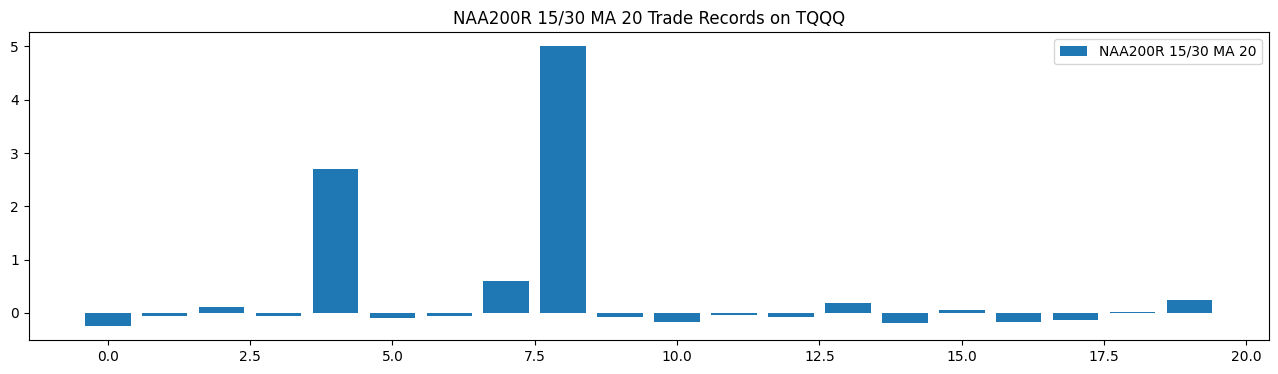

In [11]:
naa200r_bt_weekly.plot_records()
naa200r_bt_weekly.trade_records

In [12]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)



NAA200R 15/30 MA 20:
cumulative return      : 1269.52%
compound anual return  : 38.6983%
max_drawdown           : -59.61%
sharp_ratio            : 5.60%
average of daily return: 0.1877%
std of daily return    : 3.3507%
number of trades       : 21,
trading days           : 2904,
batting Average        : 40.00%
Gain Average           : 111.41%
Loss Average           : -11.62%
Risk Reward Ratio      : 9.59
Gain STD               : 180.71%
Loss STD               : 6.78%
        


<Figure size 640x480 with 0 Axes>

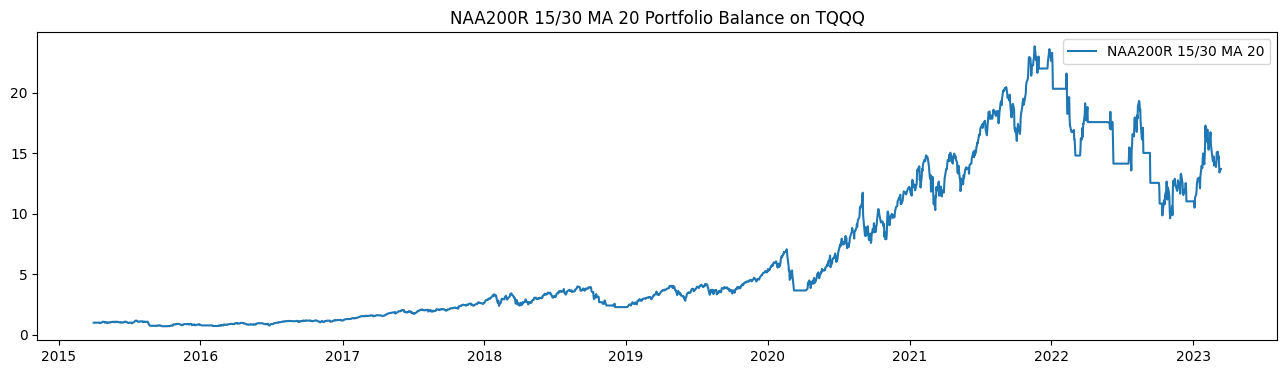

In [13]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

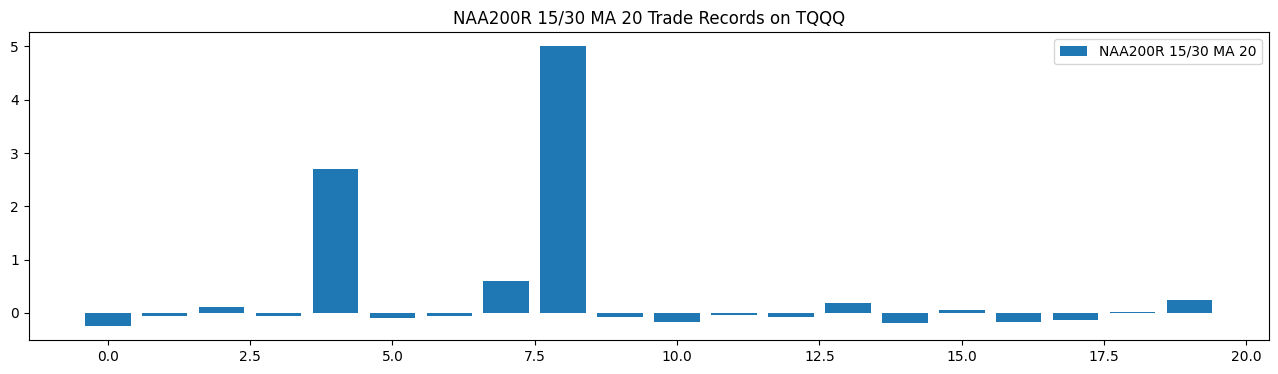

In [14]:
naa200r_bt_daily.plot_records()

Index(['Day', 'Open', 'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal'], dtype='object')
Index(['TQQQ', 'Weekday', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'Day', 'Open',
       'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal_y'],
      dtype='object')


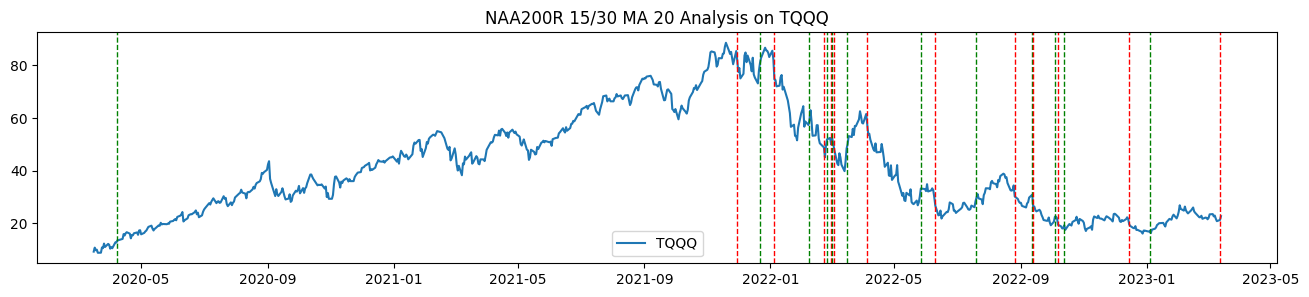

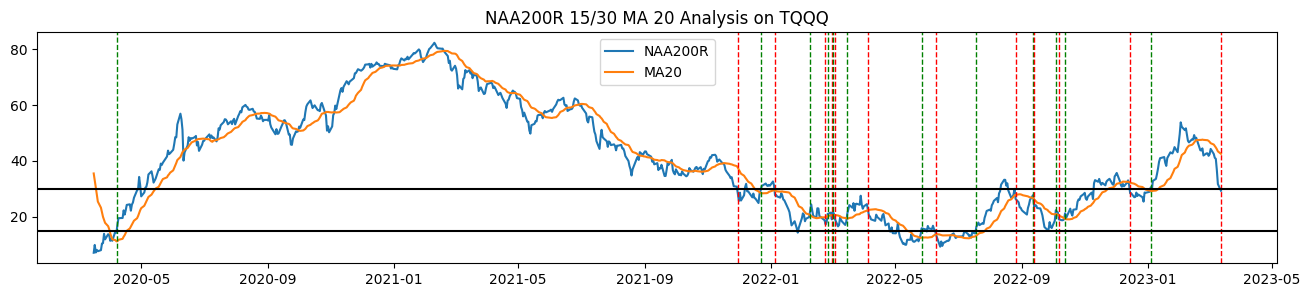

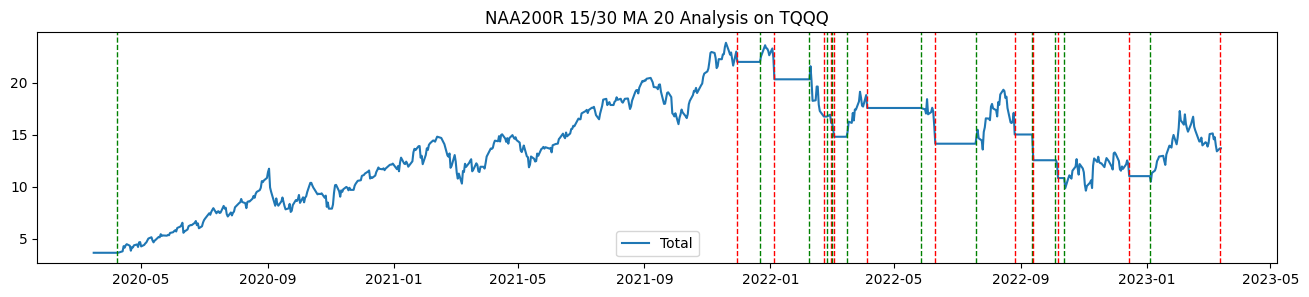

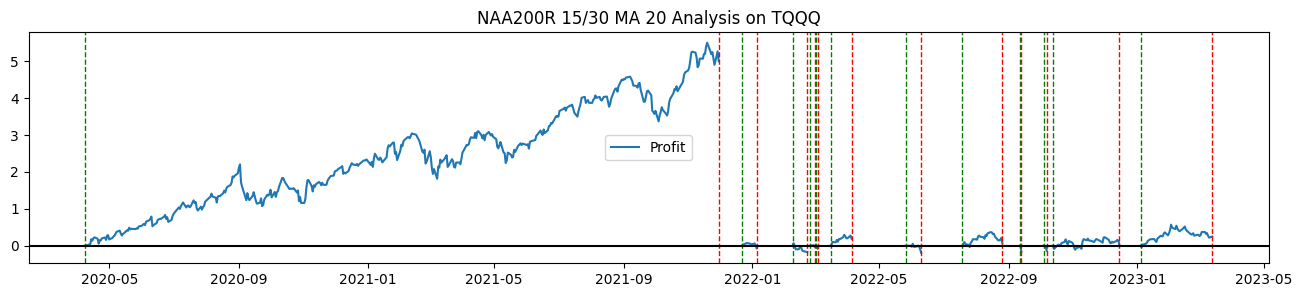

In [15]:

print(stg.joined_data.columns)
print(naa200r_bt_daily.joined_data.columns)
plot_start = dt.datetime(2020,3,14)
plot_end = dt.datetime(2023,3,14)
naa200r_bt_daily.plot_joined_data([ticker.ticker], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['NAA200R','MA20'], plot_start, plot_end, ydash_low=15, ydash_high=30)
naa200r_bt_daily.plot_joined_data(['Total'], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)